In [65]:
import numpy as np
from numpy import load
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, Normalizer
from keras import backend as K
import keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score



In [66]:
test_imagenes  = np.load('./Input/test_imagenes.npy')
test_etiqueta  = np.load('./Input/test_etiqueta.npy')
etiqueta_fruta = np.load('./Input/etiqueta_fruta.npy')
imagen_fruta   = np.load('./Input/imagen_fruta.npy')
nombre_frutas_corregido   = np.load('./Input/nombre_frutas_corregido.npy')

In [67]:
imagen_fruta.shape,etiqueta_fruta.shape,test_etiqueta.shape,test_imagenes.shape

((60486, 35, 35, 3), (60486,), (20618,), (20618, 35, 35, 3))

### Vamos a hacer una estadarizacion y PCA

In [ ]:
estandar = StandardScaler()
listad_imagenes = [imagenes.flatten() for imagenes in imagen_fruta]
images_estandar = estandar.fit_transform(listad_imagenes)

In [5]:
#normalizar = Normalizer()

#imagenes_normalizadas = normalizar.fit_transform(images_estandar )

### Procedo a pasarle el pca

In [6]:
pca = PCA(n_components=50)
imagenes_Pca = pca.fit_transform(images_estandar)

In [7]:
print(pca.explained_variance_)

[944.09969604 369.4519638  245.59091652 198.0107361  144.80569923
  86.01774932  83.38738394  71.64526551  66.54279362  63.32204239
  59.25570719  47.42335314  43.29202838  36.35804054  34.17258701
  31.43249531  29.5315148   27.39813532  27.31591523  23.76230889
  22.13260016  21.64250963  20.53049314  19.71161929  18.83959534
  18.25727067  17.57691257  15.99221836  15.68232613  14.71688896
  13.79313631  13.61509773  13.07856626  12.53072839  12.05032636
  11.57862101  11.2779085   11.11636667  10.86171095  10.53821264
  10.00086227   9.70464514   9.23647136   9.03254118   8.67528759
   8.3985355    8.23156021   7.88215396   7.61373303   7.52869256]


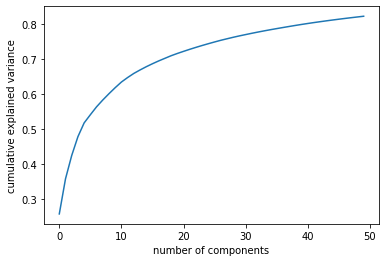

In [7]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Le pasamos un T-SNE

In [8]:


X_embedded = TSNE(n_components=2).fit_transform(imagenes_Pca)

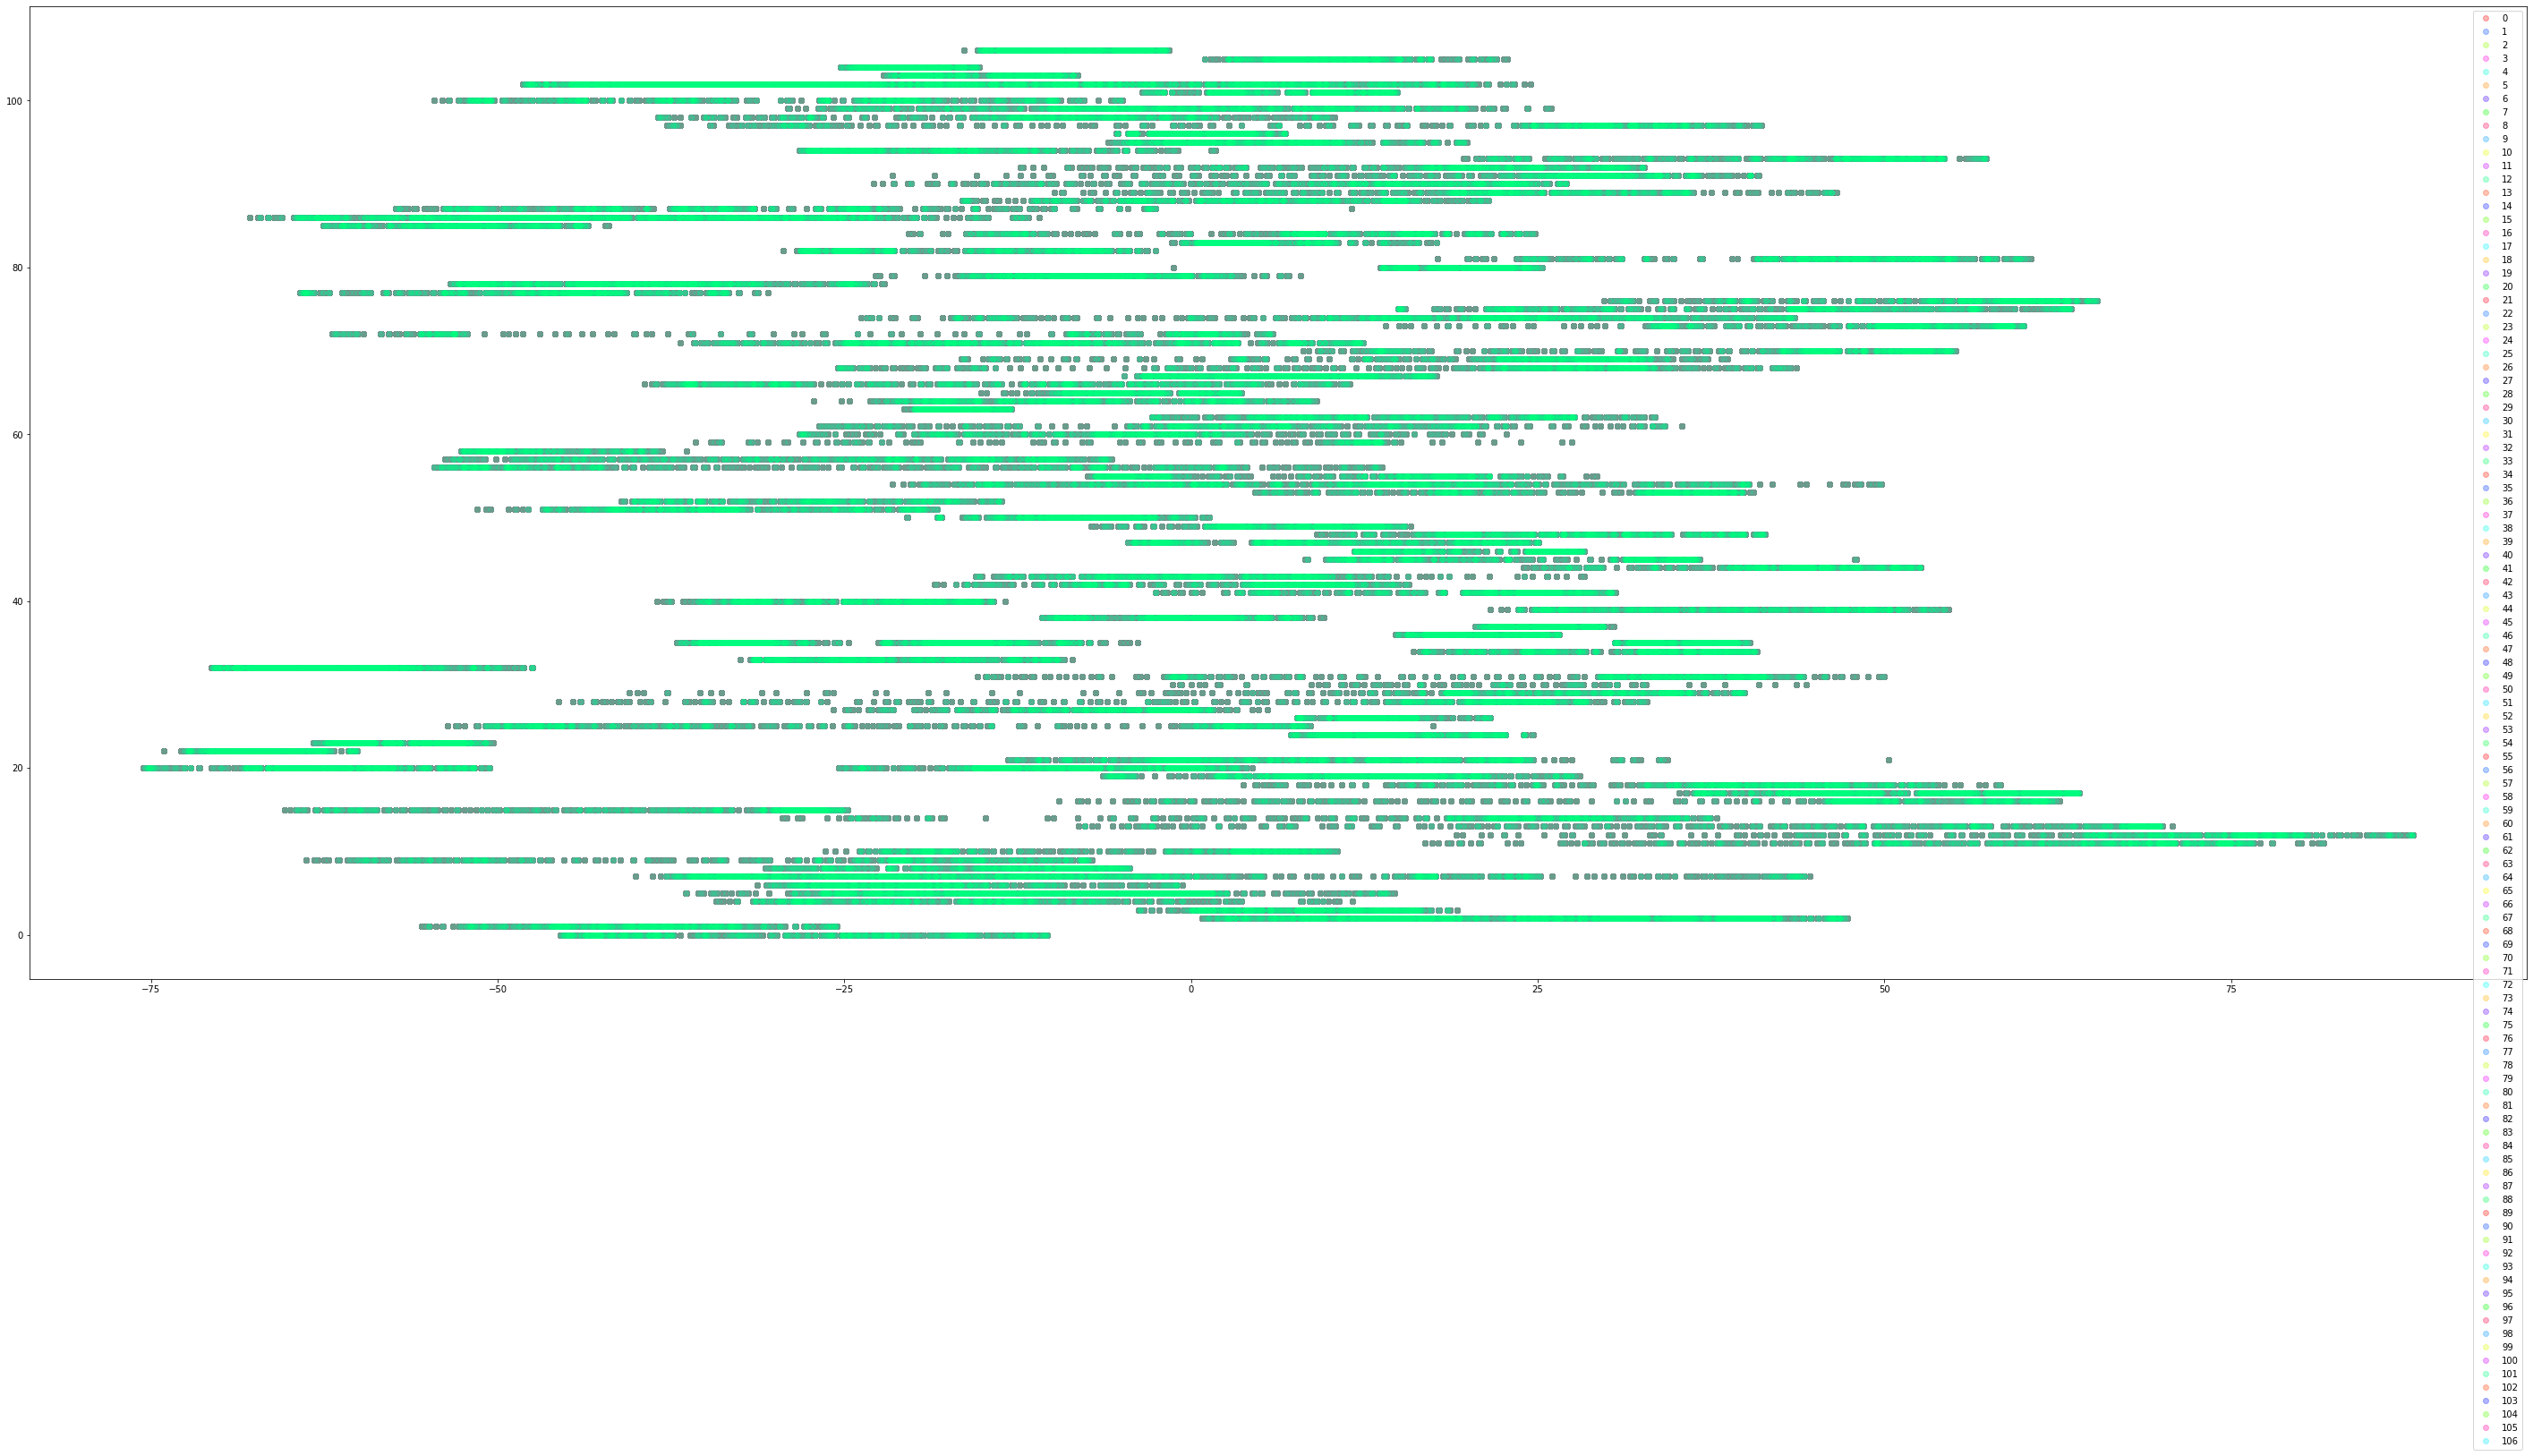

In [10]:
#plt.scatter(X[:, 0], X[:, 1])
import matplotlib.cm as cm


from matplotlib.colors import hsv_to_rgb
from cycler import cycler

colors = [hsv_to_rgb([(i * 0.618033988749895) % 1.0, 1, 1])
          for i in range(1000)]
plt.rc('axes', prop_cycle=(cycler('color', colors)))
plt.figure(figsize=(50,20))

for e,colores in zip(X_embedded[:10000],colors):
    plt.plot(imagenes_Pca[:,0],etiqueta_fruta,"o",color=colores,alpha=0.3)
    plt.legend(np.unique(etiqueta_fruta))

# Random Forest Clasification


Renombramos a X_train e y_train, y en X_test e y_test

In [189]:
num_classes = 107 # Tengo 107 classes
img_rows, img_cols = 35,35 # Dimensiones de salida son 35




X_train, X_test = imagen_fruta, test_imagenes
y_train, y_test = etiqueta_fruta, test_etiqueta
"""
#Normalizo los valores de color entre 0 y 1
X_train = X_train/255
X_test = X_test/255

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 1)
    
"""


#Hago una versión aplanada para algunos de nuestros modelos.
X_flat_train = X_train.reshape(X_train.shape[0], 35*35*3)
X_flat_test = X_test.reshape(X_test.shape[0], 35*35*3)

#Categorizamos los valores de salida el numero de clases 107
y_train = keras.utils.to_categorical(y_train,num_classes =107)
y_test = keras.utils.to_categorical(y_test,num_classes =107)

#d2_train_dataset = train_dataset.reshape((nsamples,nx*ny))
print('Tamaños originales:', X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print('Tamaños cuando los modifiquemos:', X_flat_train.shape, X_flat_test.shape)

Tamaños originales: (60486, 35, 35, 3) (20618, 35, 35, 3) (60486, 107) (20618, 107)
Tamaños cuando los modifiquemos: (60486, 3675) (20618, 3675)


In [14]:
from sklearn.ensemble import RandomForestClassifier
RandomForest= RandomForestClassifier(max_depth=2, random_state=0)
y_pred = RandomForest.fit(X_flat_train, y_train)



In [15]:
y_predRandom = y_pred.predict(X_flat_test)
print(f"Exactitud con RandomForestClassifier : {accuracy_score(y_test, y_predRandom)}")
print(f"Exactitud con roc_auc_score {roc_auc_score(y_test, y_predRandom)}")

Exactitud es : 0.040498593462023474
Exactitud con roc_auc_score 0.5044462691221517


In [19]:
y_trainGranier =   np.reshape(y_train, (-1, 2))
#y_testGranier = y_test.ravel()
y_train[:,0].shape

(60486,)

### Le pasamos un GradientBoostingClassifier

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0)
model =clf.fit(X_flat_train, y_train[:,0])


In [22]:

predicion = model.predict(X_flat_test)

model.score(X_flat_test, y_test[:,0])

0.9951013677369289

### Le pasamos un ExtraTreesClassifier

In [4]:
 from sklearn.ensemble import ExtraTreesClassifier

clfEX= ExtraTreesClassifier(n_estimators=100, random_state=0)

clfEX.fit(X_flat_train, y_train)

y_predETC = clfEX.predict(X_flat_test)

In [6]:

print(f"Exactitud con ExtraTreesClassifier : {accuracy_score(y_test, y_predETC)}")
print(f"Exactitud con roc_auc_score {roc_auc_score(y_test, y_predETC)}")

Exactitud con ExtraTreesClassifier : 0.8056552526918227
Exactitud con roc_auc_score 0.8950001656907833


### Vamos a probar con un SVM linear

In [69]:
from sklearn.svm import SVC
from sklearn import metrics
svm = SVC(gamma='auto', kernel='linear', probability=True)
svm.fit(X_flat_train, y_train[:,0]) 
y_predSVC = svm.predict(X_flat_test)

#Evaluation
precision = metrics.accuracy_score(y_predSVC, y_test[:,0]) * 100
print("La exactitud con SVM: {0:.2f}%".format(precision))



La exactitud con SVM: 99.70%


In [47]:
import pandas as pd
df = pd.read_csv("./Input/ombre_Frutas.csv")
df

,Unnamed: 0,Apple Braeburn,Apple Crimson Snow,Apple Golden,Apple Granny Smith,Apple Pink Lady,Apple Red,Apple Red Delicious,Apple Red Yellow,Apricot,...,Salak,Strawberry,Strawberry Wedge,Tamarillo,Tangelo,Tomato,Tomato Cherry Red,Tomato Maroon,Tomato Yellow,Walnut
0,0,0,1,2,3,4,5,6,7,8,...,97,98,99,100,101,102,103,104,105,106


In [48]:
df=df.drop(["Unnamed: 0"],axis=1)

In [49]:
df

,Apple Braeburn,Apple Crimson Snow,Apple Golden,Apple Granny Smith,Apple Pink Lady,Apple Red,Apple Red Delicious,Apple Red Yellow,Apricot,Avocado,...,Salak,Strawberry,Strawberry Wedge,Tamarillo,Tangelo,Tomato,Tomato Cherry Red,Tomato Maroon,Tomato Yellow,Walnut
0,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106


In [ ]:
def verificacio(foto):
    

In [5]:
print(nombre_frutas_corregido)

['Apple Golden ' 'Apple Golden ' 'Apple Golden ' ... 'Pitahaya Red'
 'Pitahaya Red' 'Pitahaya Red']


In [192]:
import cv2

def test_model(img_path):
    imagen = cv2.imread(img_path, cv2.IMREAD_COLOR)        
    print("1",imagen.shape)

    imagen = cv2.resize(imagen, (35,35))
    print("2",imagen.shape)

    imagen = cv2.cvtColor(imagen, cv2.COLOR_RGB2BGR)
    print("3",imagen.shape)
    imagen = imagen.reshape(35,35*3)
    print("4",imagen.shape)
    predicted_vector = svm.predict(imagen)
    print("5",imagen.shape)
    return fruit_names[np.argmax(predicted_vector)]


In [193]:
test_model ("/home/sergio/Downloads/IMG_20200515_164611.jpg")

1 (4000, 1844, 3)
2 (35, 35, 3)
3 (35, 35, 3)
4 (35, 105)


ValueError: X.shape[1] = 105 should be equal to 3675, the number of features at training time

In [246]:
imagen = cv2.imread("/home/sergio/Downloads/IMG_20200515_164611.jpg", cv2.IMREAD_COLOR)
print(imagen.shape)

imagen = cv2.resize(imagen, (35,35))

imagen = cv2.cvtColor(imagen, cv2.COLOR_RGB2BGR)
print(imagen.shape)
imagen = imagen.reshape(-1,35*35*3)
print(imagen.shape)
#classifier.predict(Xpred).reshape(X1.shape)
print("2",imagen.shape)
predicted_vector = svm.predict(imagen)
print(predicted_vector)

(4000, 1844, 3)
(35, 35, 3)
(1, 3675)
2 (1, 3675)
[0.]


In [129]:
from keras.models import load_model

import tensorflow as tf
from tensorflow import keras
new_model = load_model('./Input/path_to_my_model(2).h5' ,custom_objects=None,compile=False)

In [130]:
new_model